# CNNs for Traffic Sign Recognition

### Problem Statement

In a society driven by technological advancements, there is an ever-present need for improved Artificial Intelligence (AI) models to efficiently and accurately classify images. The transport industry is situated at the foreground of the AI revolution, with autonomous vehicles offering the most potential to prelude a future where intelligent transport systems redefine the way we travel. Within this domain, accurately recognising traffic signs in real-time is an essential part of designing safe and efficient autonomous vehicles for commercial use. Our project aspires to redefine the field of traffic sign recognition by developing a highly accurate Convolutional Neural Network (CNN) model that satisfies the requirements of safety, reliability and efficiency. We will leverage the German Traffic Sign Recognition Benchmark dataset (GTSRB) to form a cutting-edge solution capable of identifying and deciphering German traffic signs across a range of circumstances, using over 50,000 images partitioned into 43 classes.

To ensure that our model is adaptable and capable of generalising to real-world scenarios, we intend to use various techniques such as data augmentation to promote diversity within our dataset. Additionally, hyperparameter tuning and advanced training strategies will be harnessed to improve the overall accuracy of our network. Furthermore, we will trial a range of model architectures and conduct thorough experimentation, validation and analyses to achieve our goal of building a single expert system capable of fulfilling our objectives. Accurate traffic sign recognition has various real-world applications in autonomous driving, with the potential to create safer and more efficient roadways. Autonomous vehicles must reflect precision and reliability when navigating public roads, with traffic sign recognition being used to make crucial real-time decisions that can affect the safety of passengers, pedestrians and all other road users. Our project aims to develop a state of the art system that prioritises these features, whilst playing a pivotal role in catalysing technological growth within the domain of intelligent transport systems.

### Data Sources

---
### Now let's explore the attributes and categories of the data, and visualize them to gain a better understanding of this dataset.

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import os

## About Dataset

The German Traffic Sign Benchmark is a multi-class, single-image classification challenge held at the International Joint Conference on Neural Networks (IJCNN) 2011. We cordially invite researchers from relevant fields to participate: The competition is designed to allow for participation without special domain knowledge. Our benchmark has the following properties:

- Single-image, multi-class classification problem
- More than 40 classes
- More than 50,000 images in total
- Large, lifelike database

### Train data

In [2]:
# Train.csv
train_csv_path = os.getcwd() + "\dataset\Train.csv"
train_df = pd.read_csv(train_csv_path, usecols=['ClassId', 'Path', 'Width', 'Height'])
train_df.head()

,Width,Height,ClassId,Path
0,27,26,20,Train/20/00020_00000_00000.png
1,28,27,20,Train/20/00020_00000_00001.png
2,29,26,20,Train/20/00020_00000_00002.png
3,28,27,20,Train/20/00020_00000_00003.png
4,28,26,20,Train/20/00020_00000_00004.png


In [3]:
# Calculate the area of an image.
train_df['Area'] = train_df['Width'] * train_df['Height']

In [4]:
train_df.head()

,Width,Height,ClassId,Path,Area
0,27,26,20,Train/20/00020_00000_00000.png,702
1,28,27,20,Train/20/00020_00000_00001.png,756
2,29,26,20,Train/20/00020_00000_00002.png,754
3,28,27,20,Train/20/00020_00000_00003.png,756
4,28,26,20,Train/20/00020_00000_00004.png,728


In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39209 entries, 0 to 39208
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Width    39209 non-null  int64 
 1   Height   39209 non-null  int64 
 2   ClassId  39209 non-null  int64 
 3   Path     39209 non-null  object
 4   Area     39209 non-null  int64 
dtypes: int64(4), object(1)
memory usage: 1.5+ MB


It seems that train_df is a DataFrame object with 39209 rows and 5 columns, each column having corresponding column names, non-null value counts, and data types. Among them, the data types of four columns are integers (int64), while the data type of the fifth column is a string (object).

Now lets Add labels.

In [6]:
# Label Overview (from Kaggle)
classes = { 0:'Speed limit (20km/h)',
            1:'Speed limit (30km/h)', 
            2:'Speed limit (50km/h)', 
            3:'Speed limit (60km/h)', 
            4:'Speed limit (70km/h)', 
            5:'Speed limit (80km/h)', 
            6:'End of speed limit (80km/h)', 
            7:'Speed limit (100km/h)', 
            8:'Speed limit (120km/h)', 
            9:'No passing', 
            10:'No passing veh over 3.5 tons', 
            11:'Right-of-way at intersection', 
            12:'Priority road', 
            13:'Yield', 
            14:'Stop', 
            15:'No vehicles', 
            16:'Veh > 3.5 tons prohibited', 
            17:'No entry', 
            18:'General caution', 
            19:'Dangerous curve left', 
            20:'Dangerous curve right', 
            21:'Double curve', 
            22:'Bumpy road', 
            23:'Slippery road', 
            24:'Road narrows on the right', 
            25:'Road work', 
            26:'Traffic signals', 
            27:'Pedestrians', 
            28:'Children crossing', 
            29:'Bicycles crossing', 
            30:'Beware of ice/snow',
            31:'Wild animals crossing', 
            32:'End speed + passing limits', 
            33:'Turn right ahead', 
            34:'Turn left ahead', 
            35:'Ahead only', 
            36:'Go straight or right', 
            37:'Go straight or left', 
            38:'Keep right', 
            39:'Keep left', 
            40:'Roundabout mandatory', 
            41:'End of no passing', 
            42:'End no passing veh > 3.5 tons' }

In [7]:
# Take a look at the quantity of each category.
class_distribution = train_df['ClassId'].value_counts()
class_distribution = class_distribution.rename(index=classes).reset_index()
class_distribution = class_distribution.rename(columns={'index': 'Classes', 'ClassId': 'Count'})
class_distribution

,Classes,Count
0,Speed limit (50km/h),2250
1,Speed limit (30km/h),2220
2,Yield,2160
3,Priority road,2100
4,Keep right,2070
5,No passing veh over 3.5 tons,2010
6,Speed limit (70km/h),1980
7,Speed limit (80km/h),1860
8,Road work,1500
9,No passing,1470


<Figure size 1500x800 with 0 Axes>

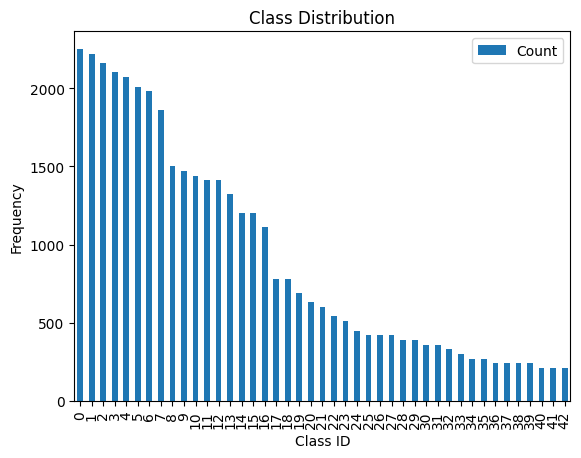

In [8]:
# Visualizing the class distribution
plt.figure(figsize=(15, 8))
class_distribution_sorted = class_distribution.sort_index()  # Sort the index of category distribution.
class_distribution_sorted.plot(kind='bar')
plt.title('Class Distribution')
plt.xlabel('Class ID')
plt.ylabel('Frequency')
plt.show()

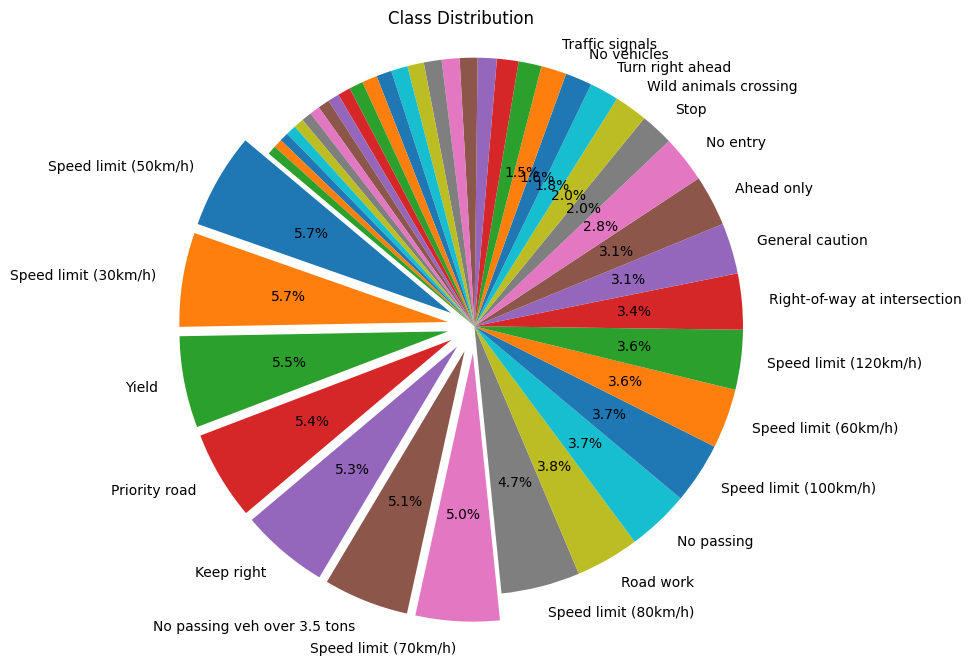

In [9]:
# A pie chart visualizing the proportion of each category, with labels for proportions below 1.5% hidden for aesthetic purposes
# and the top 7 categories highlighted.
labels = class_distribution['Classes']
sizes = class_distribution['Count']
total = sum(sizes)
percentages = [(size / total) * 100 for size in sizes]
# Create a new explosion array for the first 7 classes
explode = [0.1 if i < 7 else 0 for i in range(len(labels))]

# Plot the pie chart
plt.figure(figsize=(8, 8))
patches, texts, autotexts = plt.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', startangle=140)

# Adjust label positions
for i, percentage in enumerate(percentages):
    if percentage <= 1.5:
        autotexts[i].set_text('')  # Do not show labels for parts with less than or equal to 1.5%
        texts[i].set_text('')

# Display the pie chart
plt.axis('equal')  # Ensure it's a circle
plt.title('Class Distribution')
plt.show()


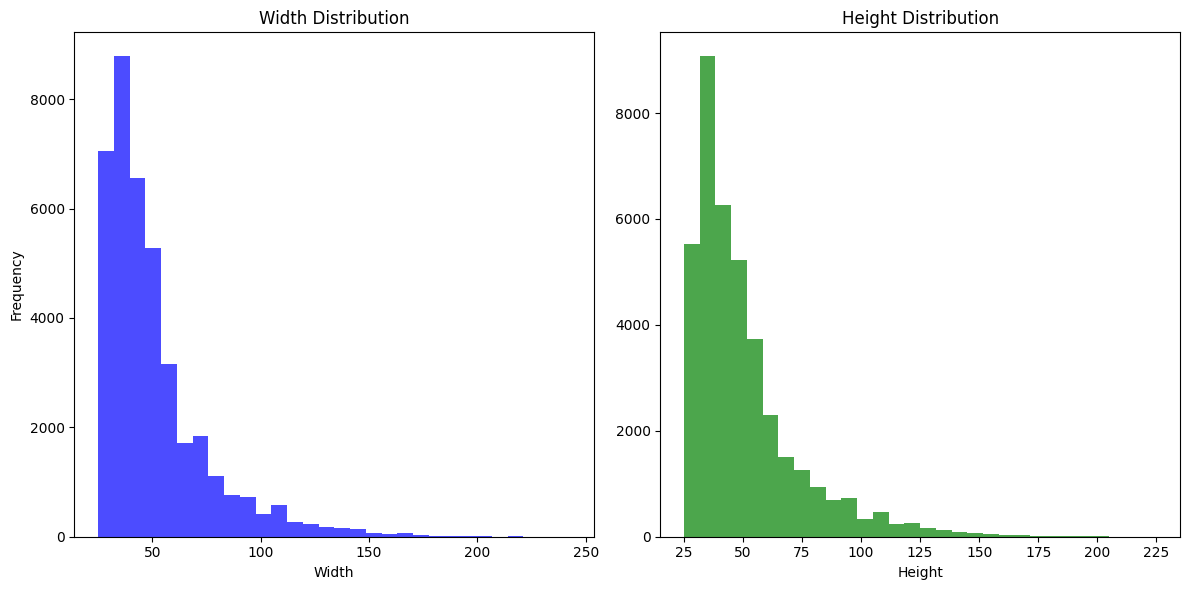

In [10]:
# Analyzing image size distribution
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(train_df['Width'], bins=30, color='blue', alpha=0.7)
plt.title('Width Distribution')
plt.xlabel('Width')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(train_df['Height'], bins=30, color='green', alpha=0.7)
plt.title('Height Distribution')
plt.xlabel('Height')

plt.tight_layout()  # Adjust the layout of the subgraph.
plt.show()

In [11]:
unique_values = train_df['Area'].unique()
len(unique_values)

2034

View the corresponding quantity of images for different sizes.

In [12]:
area_counts = train_df['Area'].value_counts()
area_counts = train_df['Area'].value_counts().rename_axis('Area').reset_index(name='Count')
len(area_counts),area_counts

(2034,
        Area  Count
 0       930    580
 1      1122    580
 2      1056    548
 3      1190    509
 4       992    504
 ...     ...    ...
 2029  16724      1
 2030  18788      1
 2031  20207      1
 2032  13516      1
 2033  14632      1
 
 [2034 rows x 2 columns])

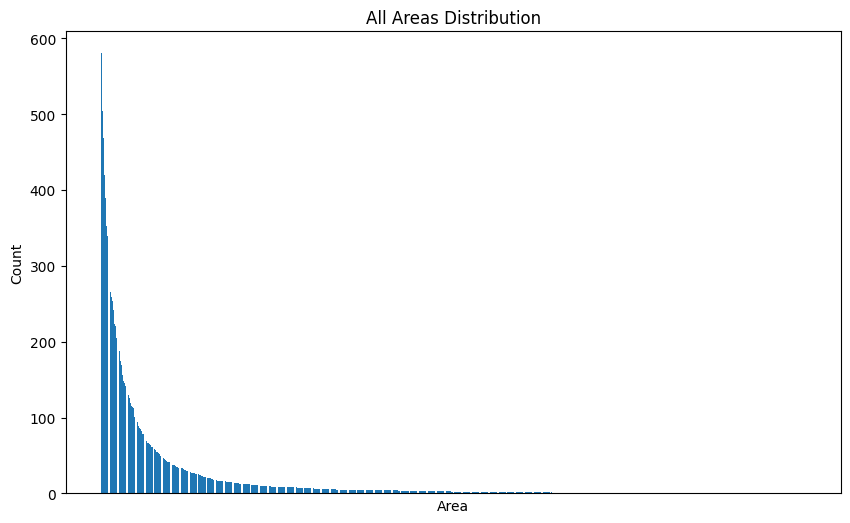

In [13]:
# Visualizing the number of images corresponding to different sizes.
area_counts['Area'] = area_counts['Area'].astype(str)

unique_categories = area_counts['Area'].unique()

plt.figure(figsize=(10, 6))
plt.bar(area_counts['Area'], area_counts['Count'])
plt.xlabel('Area')
plt.ylabel('Count')
plt.title('All Areas Distribution')
plt.xticks([])

plt.show()


In [14]:
top_categories = area_counts[area_counts['Count'] > 200]['Area']
print(top_categories)

0      930
1     1122
2     1056
3     1190
4      992
5      870
6     1332
7     1260
8     1482
9     1406
10     812
11    1560
12     961
13    1640
14     900
15    1225
16    1024
17    1089
18    1444
19    1156
20     841
21    1296
22     756
23    1722
24    1369
25    1806
26    1600
27    1849
28     784
29    1521
30    1681
31    1980
32    1892
33    2162
34    1224
35     960
36    2070
37    1023
38    1295
39    1443
40    1155
41    1520
42     899
43    2352
44    1764
45    1599
46    1088
47    2256
48     702
Name: Area, dtype: object


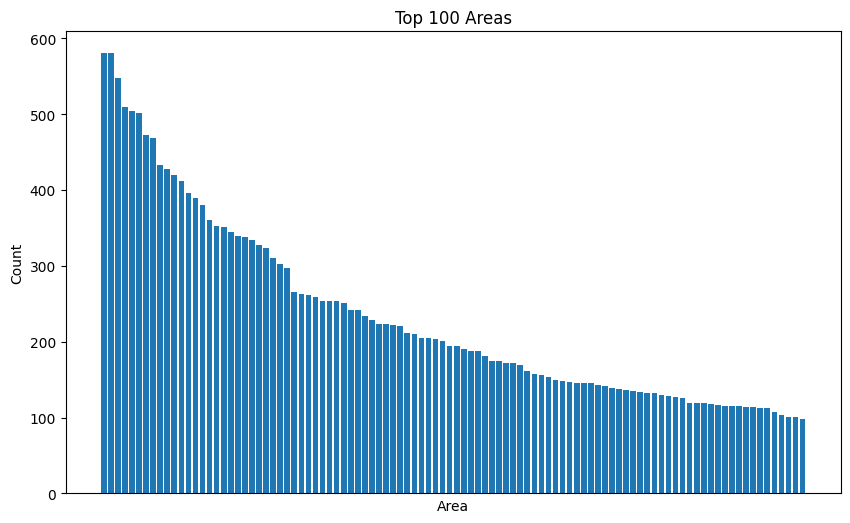

In [15]:
# Visualizing the quantity relationship of the top 100 image sizes.
# Get the top one hundred unique string categories.
top_10_categories = area_counts['Area'].unique()[:100]

#  Filter out data of the top 100 string categories.
top_100_areas = area_counts[area_counts['Area'].isin(top_10_categories)]

plt.figure(figsize=(10, 6))
plt.bar(top_100_areas['Area'], top_100_areas['Count'])
plt.xlabel('Area')
plt.ylabel('Count')
plt.title('Top 100 Areas')
plt.xticks([])
plt.show()


Display the data divided into ten intervals.

                 Area  Count
0    (570.95, 6030.0]  34752
1   (6030.0, 11435.0]   2948
2  (11435.0, 16840.0]    934
3  (16840.0, 22245.0]    345
4  (22245.0, 27650.0]    124
5  (27650.0, 33055.0]     65
6  (33055.0, 38460.0]     22
7  (38460.0, 43865.0]     11
8  (43865.0, 49270.0]      7
9  (49270.0, 54675.0]      1


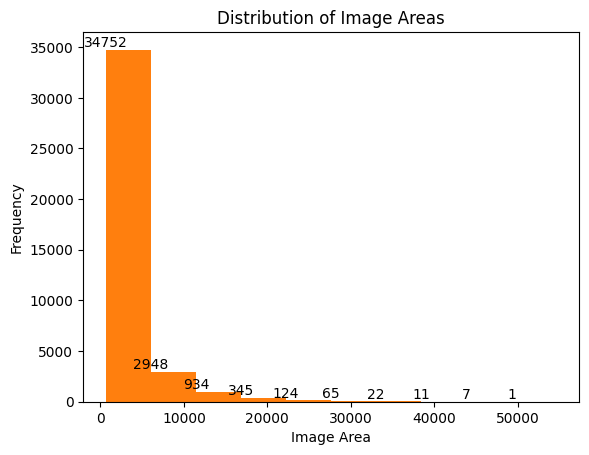

In [16]:
import pandas as pd

area_bins = pd.cut(train_df['Area'], bins=10)

area_counts = area_bins.value_counts().rename_axis('Area').reset_index(name='Count')

print(area_counts)

# Draw a histogram of the area.
plt.hist(train_df['Area'], bins=10)
# Obtain the height of each pillar.
hist, bins, _ = plt.hist(train_df['Area'], bins=10)

# Add text labels at the top of each column.
for i in range(len(hist)):
    plt.text(bins[i], hist[i], str(int(hist[i])), ha='center', va='bottom')

plt.xlabel('Image Area')
plt.ylabel('Frequency')
plt.title('Distribution of Image Areas')

plt.show()

Most of the images are around 750 in size, which is approximately 27×28. Therefore, there is no need to standardize the size of the training images.

### Show some samples

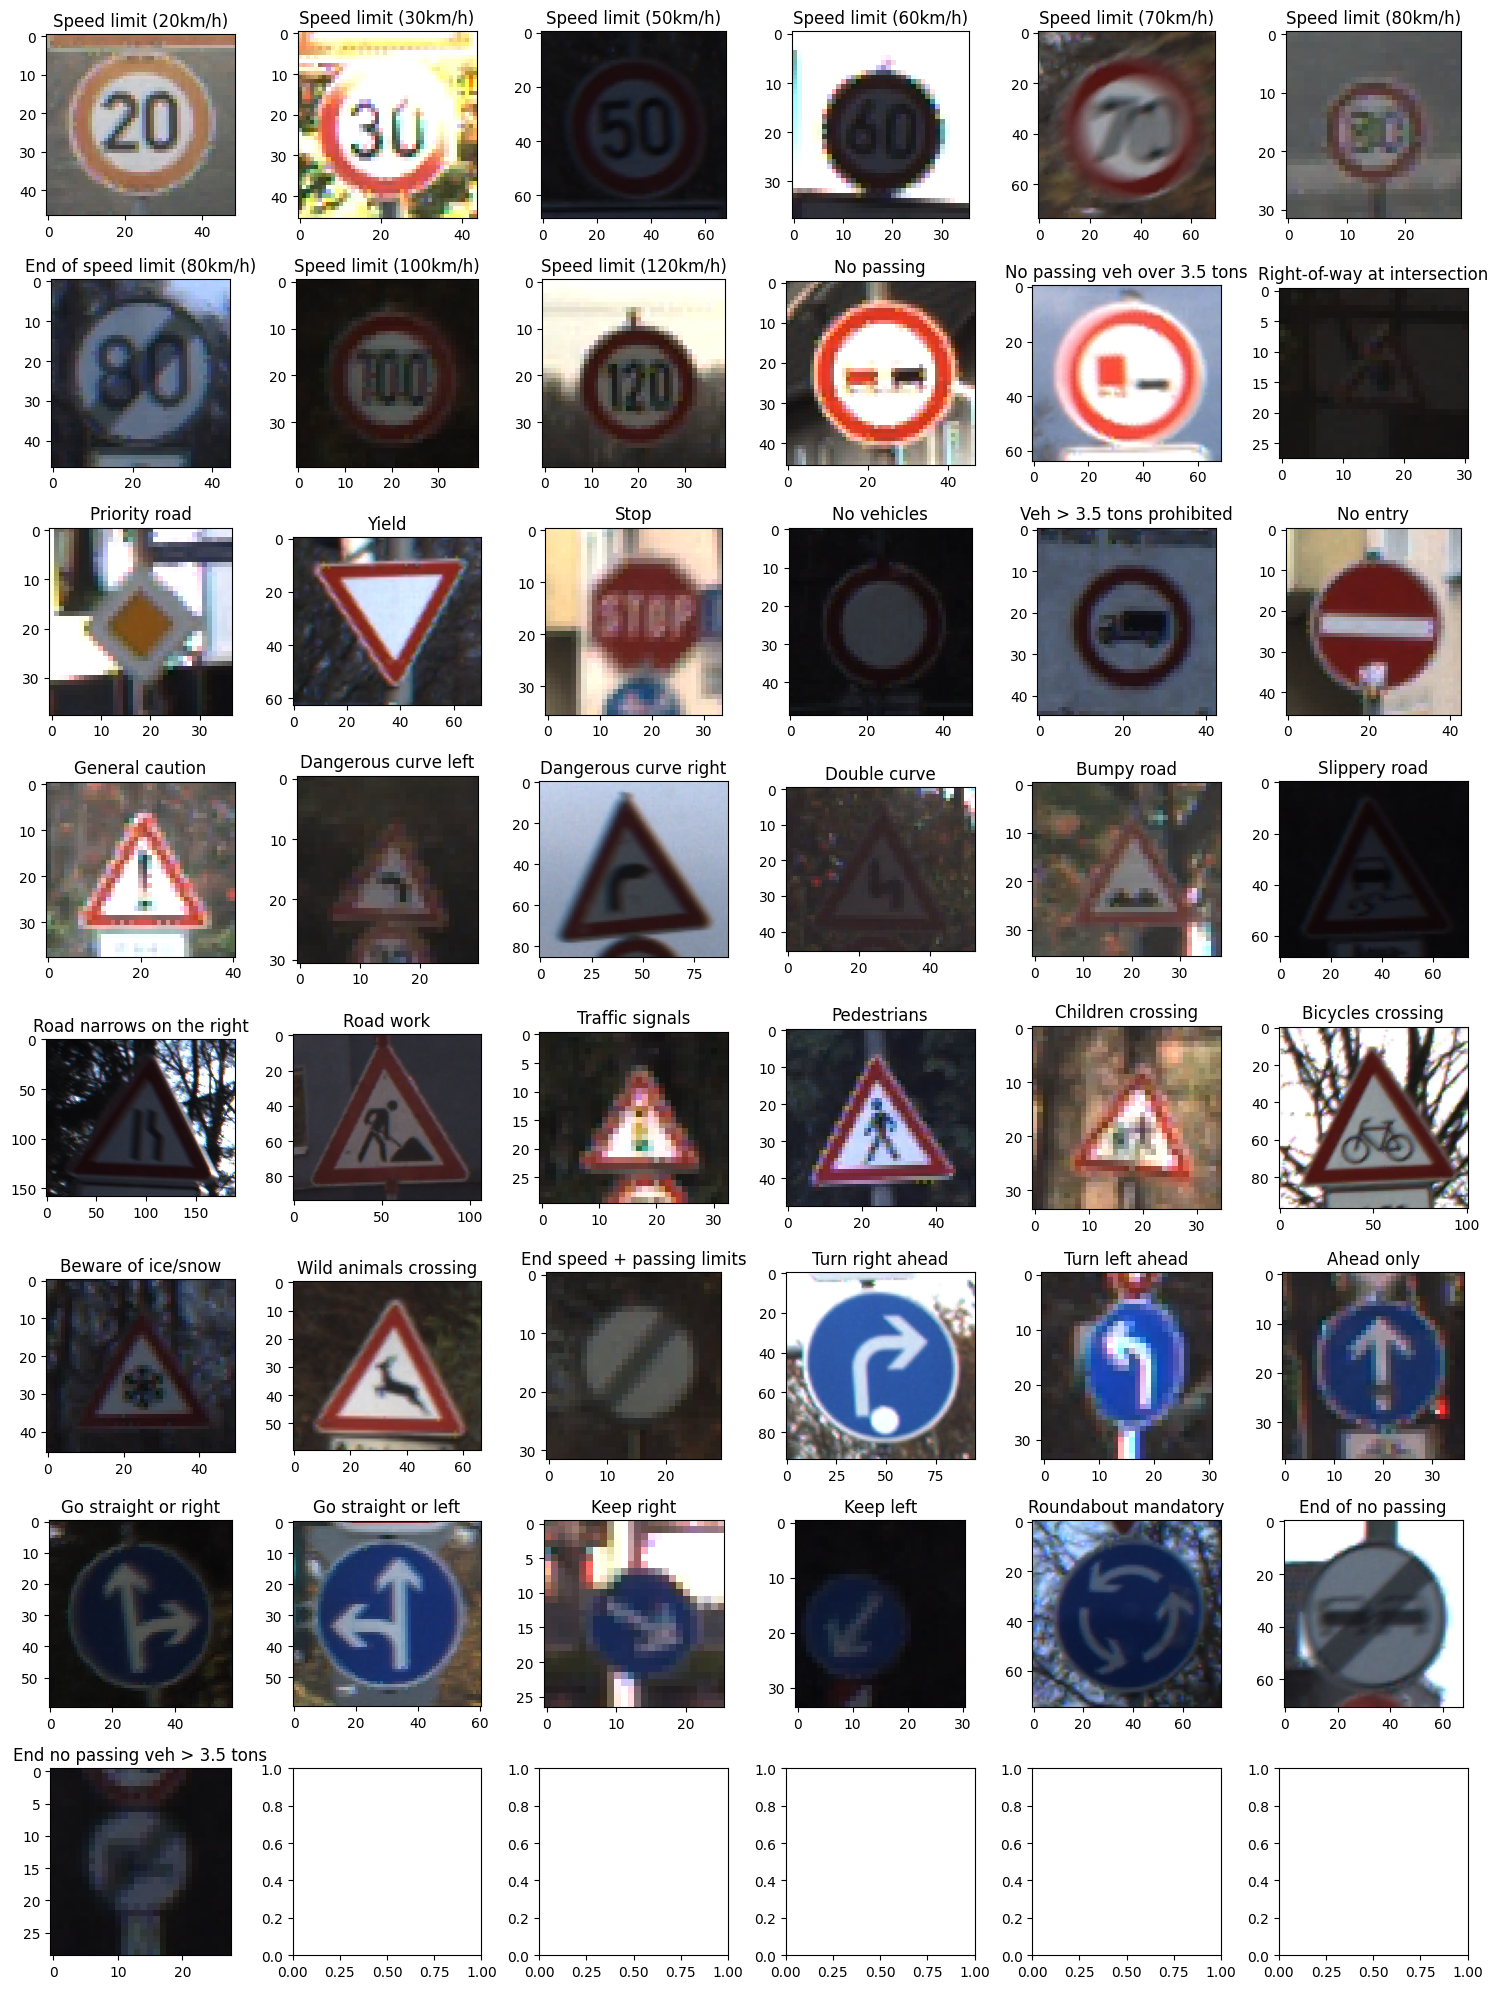

In [17]:
# Group the dataset by category
grouped = train_df.groupby('ClassId')

# Create subplot layout with 6 columns
fig, axes = plt.subplots(nrows=8, ncols=6, figsize=(15, 20))

# Loop through each categoryS
for i, (class_id, group) in enumerate(grouped):
    sample = group.sample(1)
    image_path = os.getcwd()+"/dataset/" + sample['Path'].values[0]
    image = plt.imread(image_path)
    axes.flat[i].imshow(image)
    axes.flat[i].set_title(classes[class_id])

# Adjust the spacing and layout between subplots
plt.tight_layout()
plt.show()

### Test data

In [18]:
# Test.csv
test_csv_path = os.getcwd() + "\dataset\Test.csv"
test_df = pd.read_csv(test_csv_path, usecols=['ClassId', 'Path', 'Width', 'Height'])
test_df.head()

,Width,Height,ClassId,Path
0,53,54,16,Test/00000.png
1,42,45,1,Test/00001.png
2,48,52,38,Test/00002.png
3,27,29,33,Test/00003.png
4,60,57,11,Test/00004.png


In [19]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12630 entries, 0 to 12629
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Width    12630 non-null  int64 
 1   Height   12630 non-null  int64 
 2   ClassId  12630 non-null  int64 
 3   Path     12630 non-null  object
dtypes: int64(3), object(1)
memory usage: 394.8+ KB


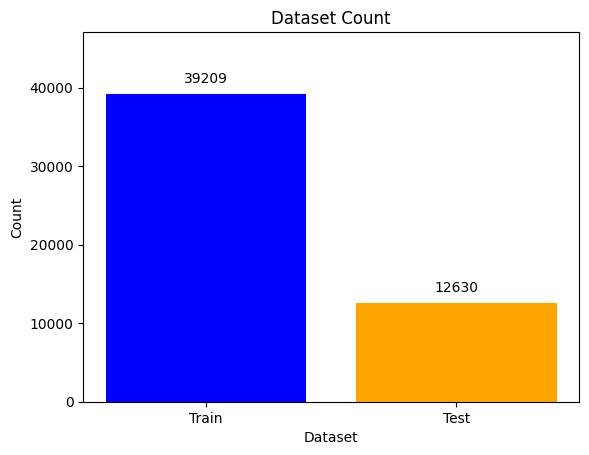

In [20]:
# Number of datasets
train_count = len(train_df)
test_count = len(test_df)
# Create a bar chart.
plt.bar(['Train', 'Test'], [train_count, test_count], color=['blue', 'orange'])
plt.title('Dataset Count')
plt.xlabel('Dataset')
plt.ylabel('Count')

# set the upper limit on the y-axis.
plt.ylim([0, max(train_count, test_count)*1.2])

# Add text labels
plt.text(0, train_count+1000, train_count, ha='center', va='bottom')
plt.text(1, test_count+1000, test_count, ha='center', va='bottom')

plt.show()

In [21]:
# Calculate the number of each category in the training set.
train_counts = train_df['ClassId'].value_counts().sort_index()
train_labels = train_counts.index.tolist()

# Calculate the number of each category in the test set.
test_counts = test_df['ClassId'].value_counts().sort_index()
test_labels = test_counts.index.tolist()

### Display the number of training and testing samples for each category.

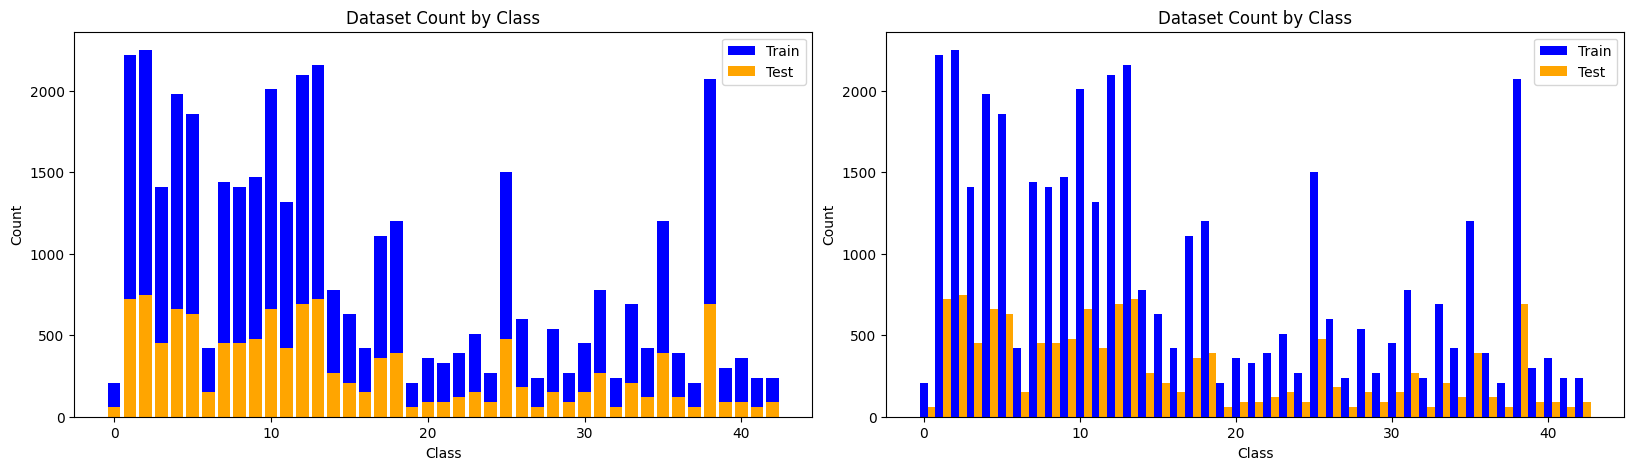

In [22]:
# Create a plotting area and set the arrangement of subplots to be 1 row and 2 columns.
fig, axs = plt.subplots(1, 2, figsize=(20, 5))

# Draw the first subplot (proportion of training set and test set)
axs[0].bar(train_labels, train_counts, color='blue', label='Train')
axs[0].bar(test_labels, test_counts, color='orange', label='Test')
axs[0].set_title('Dataset Count by Class')
axs[0].set_xlabel('Class')
axs[0].set_ylabel('Count')
axs[0].legend()

# Draw the second subplot (number of training and testing samples)
width = 0.5
axs[1].bar(train_labels, train_counts, width, color='blue', label='Train')
axs[1].bar([x + width for x in test_labels], test_counts, width, color='orange', label='Test')
axs[1].set_title('Dataset Count by Class')
axs[1].set_xlabel('Class')
axs[1].set_ylabel('Count')
axs[1].legend()

# Adjust the spacing between subplots.
plt.subplots_adjust(wspace=0.1)

plt.show()


The work related to data attributes and the number of categories ends here.

---
